In [2]:
## (1) 자료 가져오기 및 요약통계량

## (1) 자료 가져오기 및 요약통계량

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read data
med=pd.read_csv("./data/medFactor.csv")
med.head(3)

# 기술통계량 구하기
med.describe()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,19.960938,18.820312,54.695312,12.867188,25.640625,23.179688,16.171875,15.867188,38.812500,33.539062,66.906250
std,4.464034,4.088458,7.428990,2.986508,3.805786,4.159106,2.478599,2.651314,7.798395,4.097055,12.565067
min,4.000000,9.000000,26.000000,3.000000,16.000000,11.000000,4.000000,7.000000,16.000000,17.000000,9.000000
25%,17.000000,16.000000,50.750000,11.000000,23.000000,22.000000,15.000000,14.000000,34.000000,32.000000,59.000000
50%,20.000000,19.000000,55.000000,13.000000,26.000000,23.000000,17.000000,16.000000,40.000000,34.000000,67.000000
75%,23.000000,22.000000,60.250000,15.000000,29.000000,25.000000,18.000000,18.000000,45.000000,36.000000,76.000000
max,29.000000,28.000000,69.000000,19.000000,32.000000,56.000000,20.000000,20.000000,51.000000,41.000000,93.000000


### 파이썬 인자분석 : 유의성 검정

In [4]:
# pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value , p_value = calculate_bartlett_sphericity(med)
chi_square_value, p_value

(330.6403060187895, 5.546250696491925e-41)

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(med)
kmo_model

0.6874111268378431

#### (2) 초기 인자분석 실행

In [6]:
# 초기인자분석
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(med)

#help(fa) : 클래스보기


FactorAnalyzer(rotation=None, rotation_kwargs={})

In [7]:
help(fa)

Help on FactorAnalyzer in module factor_analyzer.factor_analyzer object:

class FactorAnalyzer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  FactorAnalyzer(n_factors=3, rotation='promax', method='minres', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median', svd_method='randomized', rotation_kwargs=None)
 |  
 |  The main exploratory factor analysis class.
 |  
 |  This class:
 |      (1) Fits a factor analysis model using minres, maximum likelihood,
 |          or principal factor extraction and returns the loading matrix
 |      (2) Optionally performs a rotation, with method including:
 |  
 |          (a) varimax (orthogonal rotation)
 |          (b) promax (oblique rotation)
 |          (c) oblimin (oblique rotation)
 |          (d) oblimax (orthogonal rotation)
 |          (e) quartimin (oblique rotation)
 |          (f) quartimax (orthogonal rotation)
 |          (g) equamax (orthogonal rotation)
 |  
 |  Parameters
 |  ----------
 |  n_factors

In [8]:
# 고유값 구하기
ev, v = fa.get_eigenvalues()
print(ev)

[3.37918137 1.48277065 1.25063015 0.98047706 0.7688022  0.73305114
 0.64039936 0.62219335 0.52837181 0.35193006 0.26219284]


##### 스크리 그림 그리기

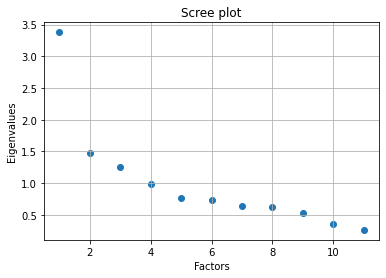

In [9]:
# 스크리 그림 그리기
plt.scatter(range(1, med.shape[1]+1), ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

### (3) 인자분석 - varimax 인자회전

In [10]:
# 인자수를 3으로 한 인자분석 - 인자회전 Varimax
# method='minres', method='ml', method='principal' : method는 3가지 옵션이 있다.
fa_varimax = FactorAnalyzer(n_factors=3, rotation="varimax", method='principal')
fa_varimax.fit(med)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [11]:
# 인자적재 계수
import numpy as np
np.round(fa_varimax.loadings_,3)

array([[ 0.659,  0.123,  0.16 ],
       [ 0.111, -0.086,  0.785],
       [ 0.783,  0.127,  0.17 ],
       [ 0.185,  0.285,  0.763],
       [ 0.731,  0.23 , -0.135],
       [ 0.646, -0.107,  0.185],
       [ 0.486,  0.48 ,  0.102],
       [ 0.016,  0.62 ,  0.289],
       [ 0.18 ,  0.652,  0.336],
       [ 0.264,  0.699, -0.04 ],
       [-0.066,  0.649, -0.277]])

In [12]:
# 인자 공통성(Communality)
np.round(fa_varimax.get_communalities(),3)

array([0.475, 0.636, 0.658, 0.698, 0.606, 0.463, 0.478, 0.468, 0.57 ,
       0.56 , 0.502])

In [13]:
# 인자 고유분산 : 1 - 공통성
np.round(fa_varimax.get_uniquenesses(),3)

array([0.525, 0.364, 0.342, 0.302, 0.394, 0.537, 0.522, 0.532, 0.43 ,
       0.44 , 0.498])

In [14]:
# 인자 분산
np.round(fa_varimax.get_factor_variance(),3)

array([[2.388, 2.134, 1.591],
       [0.217, 0.194, 0.145],
       [0.217, 0.411, 0.556]])